# Data preprocessing and Eda part

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset

df = pd.read_csv('loan_data.csv')

# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

# Display the first few rows
print("\nFirst few rows of the dataset:")
print(df.head())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_lo

In [12]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)

# If missing values exist, decide whether to fill them or drop rows (not needed here as there are no missing values)
df = df.dropna()  # Drop missing values (Only if necessary)



Missing Values in Each Column:
person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


In [13]:
# Identify categorical columns
categorical_columns = ["person_gender", "person_education", "person_home_ownership",
                       "loan_intent", "previous_loan_defaults_on_file"]

# Apply Label Encoding
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save the encoder for future use


In [14]:
# Define the feature matrix (X) and target variable (y)
X = df.drop(columns=["loan_status"])  # Features
y = df["loan_status"]  # Target variable

# Apply StandardScaler to scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [15]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Print shape of training and test sets
print("\nData Split Completed:")
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")



Data Split Completed:
Training set: (36000, 13), Testing set: (9000, 13)


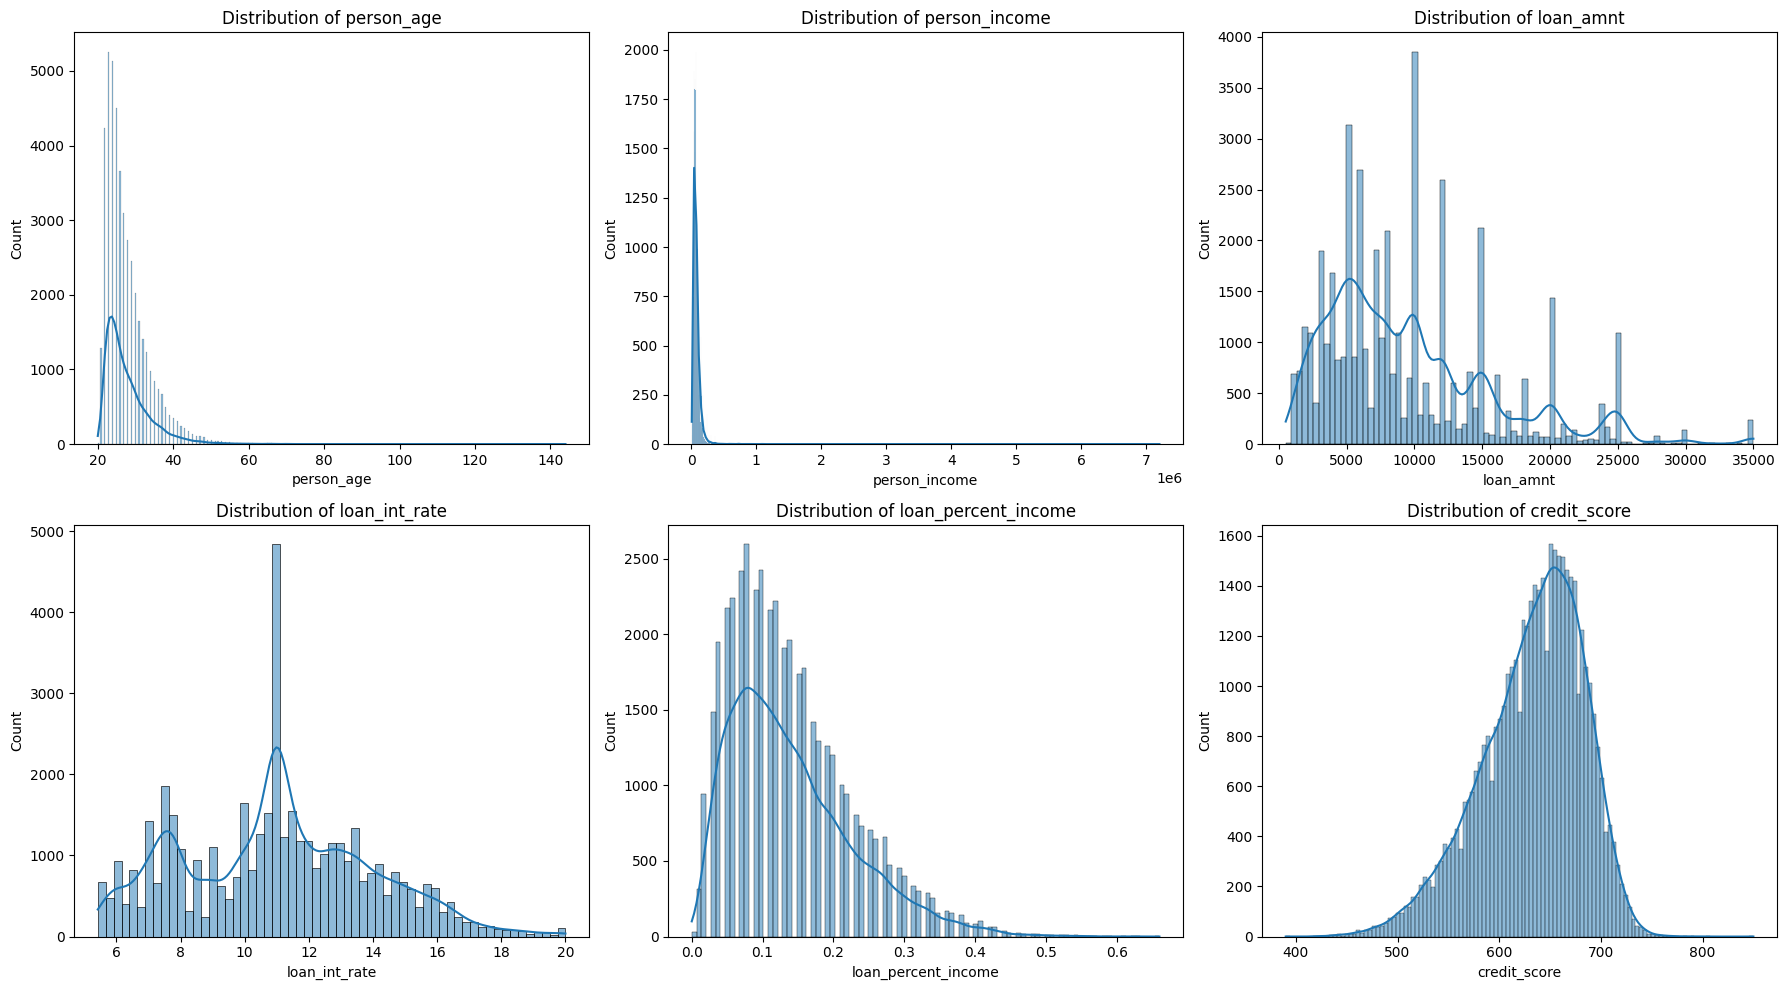

In [16]:
# Plot the distribution of numerical features
import warnings
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
num_features = ["person_age", "person_income", "loan_amnt", "loan_int_rate", "loan_percent_income", "credit_score"]

for i, col in enumerate(num_features):
    sns.histplot(df[col], kde=True, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


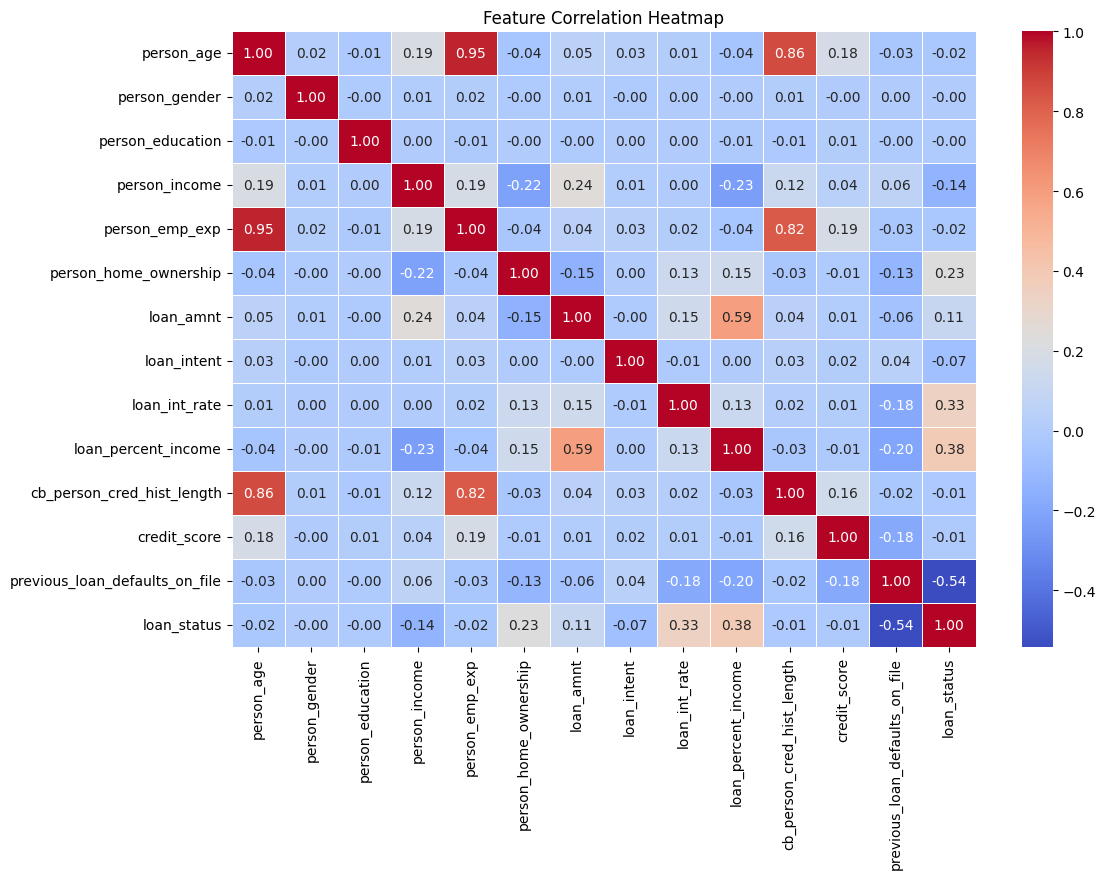

In [17]:
# Plot heatmap to check correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


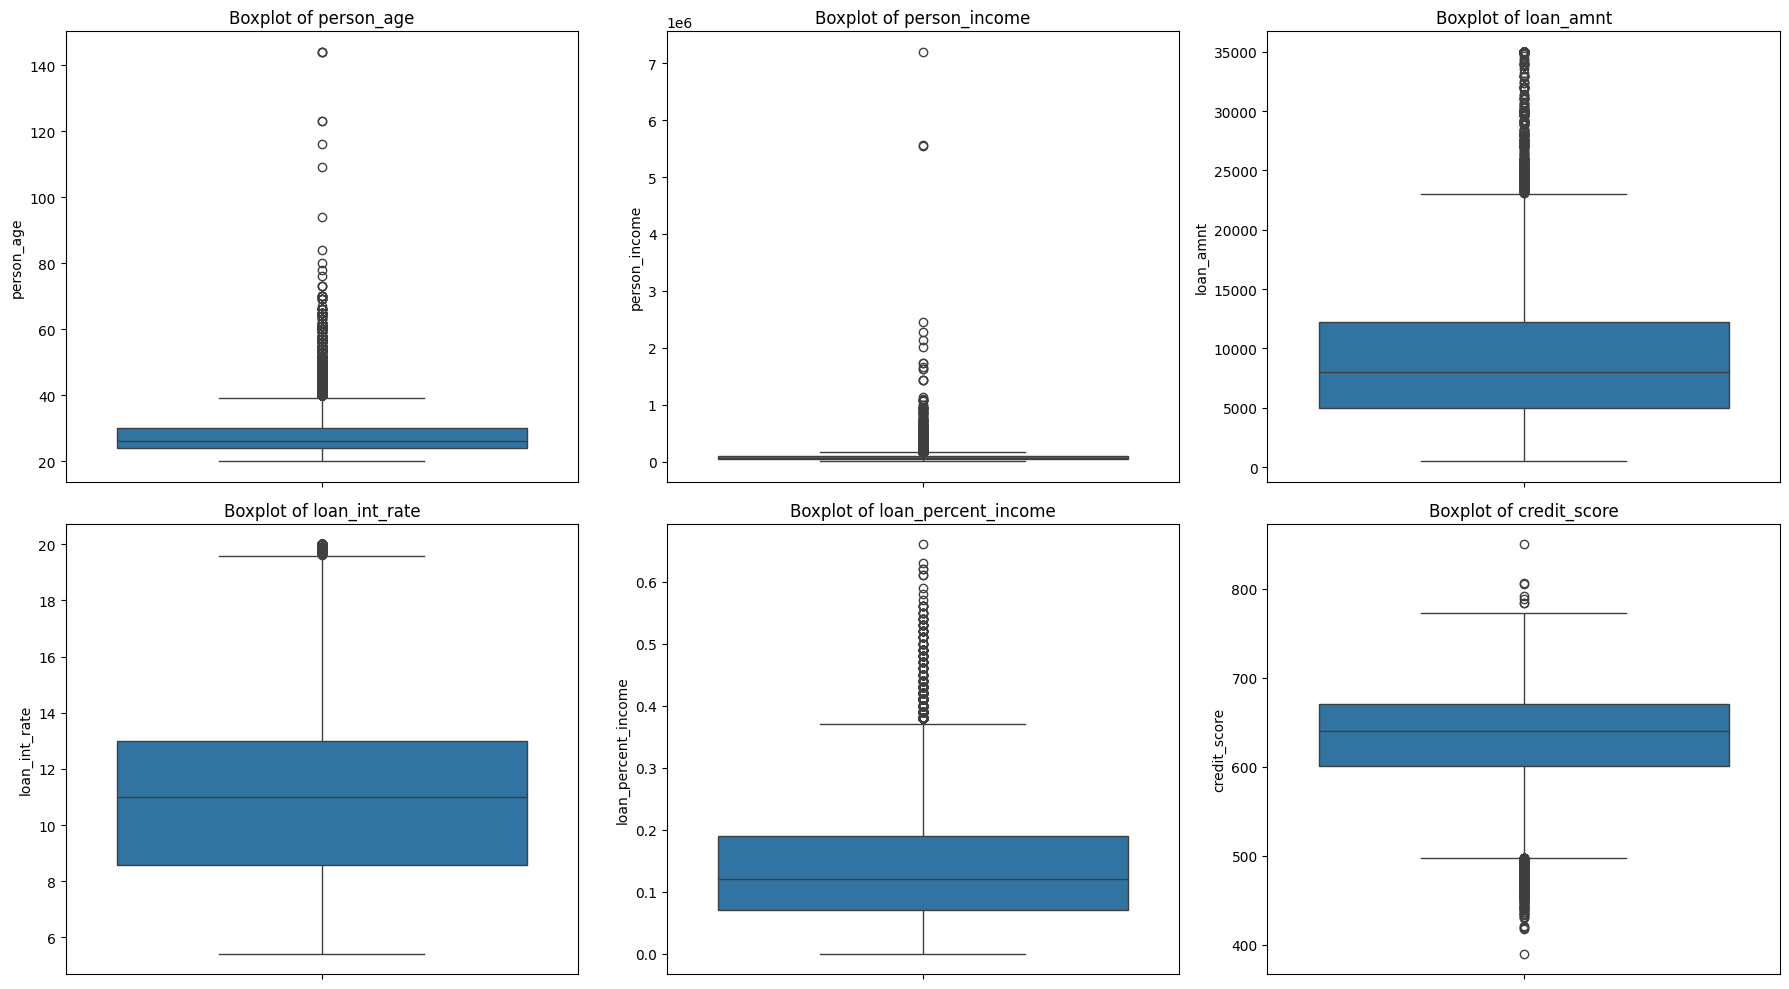

In [18]:
# Plot boxplots to detect outliers
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
for i, col in enumerate(num_features):
    sns.boxplot(y=df[col], ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


# model implementation

In [19]:
# Import necessary libraries for models and evaluation
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Scale features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

# Train models
svm_model.fit(X_train_scaled, y_train)
xgb_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Make predictions
svm_preds = svm_model.predict(X_test_scaled)
xgb_preds = xgb_model.predict(X_test)
dt_preds = dt_model.predict(X_test)

# Evaluate models
print("SVM Classification Report")
print(classification_report(y_test, svm_preds))
print("SVM Accuracy:", accuracy_score(y_test, svm_preds))

print("\n XGBoost Classification Report ")
print(classification_report(y_test, xgb_preds))
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))

print("\n Decision Tree Classification Report ")
print(classification_report(y_test, dt_preds))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))


SVM Classification Report
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7000
           1       0.83      0.75      0.78      2000

    accuracy                           0.91      9000
   macro avg       0.88      0.85      0.86      9000
weighted avg       0.91      0.91      0.91      9000

SVM Accuracy: 0.9088888888888889

 XGBoost Classification Report 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      7000
           1       0.89      0.81      0.85      2000

    accuracy                           0.93      9000
   macro avg       0.92      0.89      0.90      9000
weighted avg       0.93      0.93      0.93      9000

XGBoost Accuracy: 0.9344444444444444

 Decision Tree Classification Report 
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      7000
           1       0.77      0.77      0.77      2000

    accuracy  

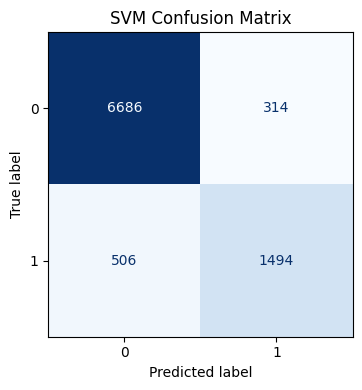

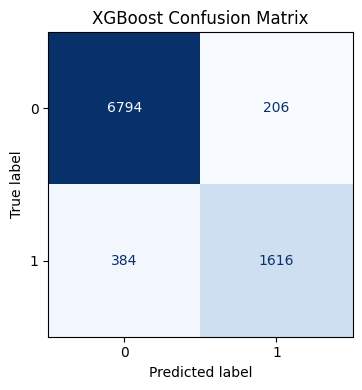

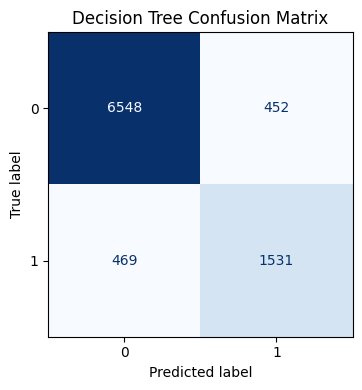

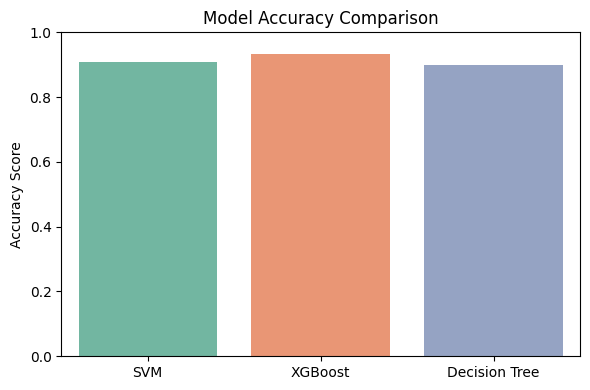

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import pandas as pd

# Store predictions in a dictionary
model_predictions = {
    "SVM": (svm_model, svm_preds),
    "XGBoost": (xgb_model, xgb_preds),
    "Decision Tree": (dt_model, dt_preds)
}

# 1. Plot Confusion Matrices
for model_name, (model_obj, preds) in model_predictions.items():
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    fig, ax = plt.subplots(figsize=(5, 4))
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    plt.title(f"{model_name} Confusion Matrix")
    plt.grid(False)
    plt.tight_layout()
    plt.show()

# 2. Accuracy Comparison Bar Plot
accuracies = {name: accuracy_score(y_test, preds) for name, (_, preds) in model_predictions.items()}

plt.figure(figsize=(6, 4))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='Set2')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()



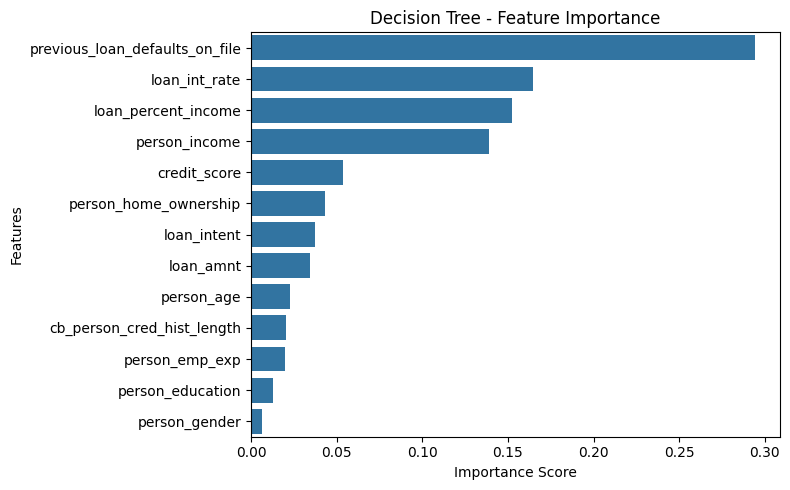

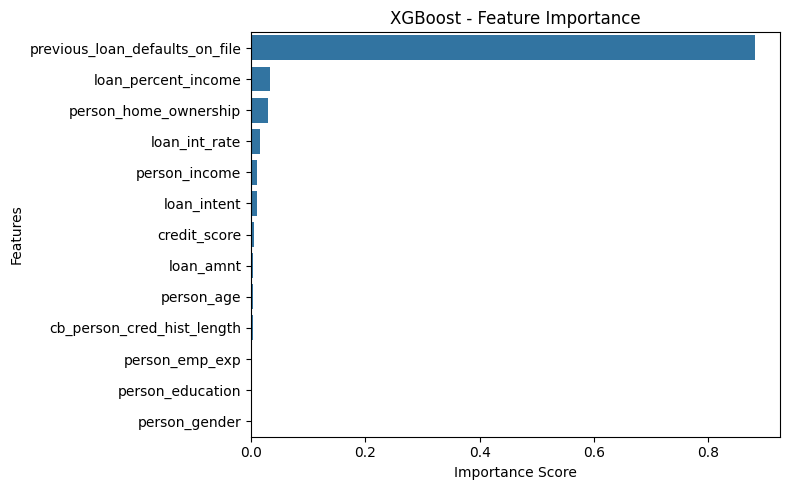

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# If not already done: store column names BEFORE train-test split
# This must be done where you define X = df.drop('target', axis=1)
# Assuming 'X' is already available in this cell, we can do:
feature_names = X.columns

# 1. Decision Tree Feature Importance
dt_importances = dt_model.feature_importances_
dt_sorted_idx = np.argsort(dt_importances)[::-1]

plt.figure(figsize=(8, 5))
sns.barplot(x=dt_importances[dt_sorted_idx], y=np.array(feature_names)[dt_sorted_idx])
plt.title("Decision Tree - Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# 2. XGBoost Feature Importance
xgb_importances = xgb_model.feature_importances_
xgb_sorted_idx = np.argsort(xgb_importances)[::-1]

plt.figure(figsize=(8, 5))
sns.barplot(x=xgb_importances[xgb_sorted_idx], y=np.array(feature_names)[xgb_sorted_idx])
plt.title("XGBoost - Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
